In [ ]:
Alberta has energy resources including crude oil & gas, coal, renewable energy, natural gas, and more, so
we calculated that what is the main source of resource of energy in each primary Facility in City of Calgary base on 3 main primary energies which are Electricity, Natural Gas, and Solar Power.
As we mention that,  the units were first converted from kWh to GJ in order to observe statistics on the same unit of energy consumption.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pandas.plotting import scatter_matrix
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import plotly.express as px
import plotly.graph_objects as go
rdata = pd.read_csv("Corporate_Energy_Consumption.csv")

for col in rdata.columns:
    print(col + ": " + str(rdata[col].dtype))

Business Unit Desc: object
FacilityName: object
Site ID: object
FacilityAddress: object
Energy Description: object
Year: int64
Month: object
Total Consumption: int64
Unit: object


In [ ]:
Primary Energy Yearly Usage of each facility

Year,2014,2015,2016,2017,2018,2019,2020,2021
FacilityName,,,,,,,,
BEARSPAW WATER TREATMENT PLANT,27006979.0,22896652.0,34507602.0,37570393.0,34437203.0,27503120.0,34585362.0,20122592.0
BONNYBROOK WASTEWATER TREATMENT PLANT,25946479.0,18470960.0,18919634.0,24187268.0,30532643.0,28814674.0,26283641.0,21374437.0
CALGARY STREET LIGHTING,91870809.0,90922781.0,78855156.0,54751112.0,48574753.0,45044868.0,42802879.0,25261505.0
FISH CREEK WASTEWATER TREATMENT PLANT,NaN,NaN,12013694.0,7911196.0,12455848.0,8647091.0,13740451.0,7626078.0
GLENMORE WATER TREATMENT PLANT - WB,20752623.0,19647504.0,18619313.0,20468133.0,19762821.0,20062555.0,18482865.0,14085753.0
MUNICIPAL COMPLEX,1151483.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PINE CREEK WASTEWATER TREATMENT PLANT,21972952.0,23077646.0,21265638.0,21626015.0,21776522.0,23153347.0,23486956.0,15192188.0
SH - BLDG W (COMPOST FACILITY),NaN,NaN,NaN,3613911.0,14359899.0,10817489.0,NaN,3148365.0


<Figure size 259200x259200 with 0 Axes>

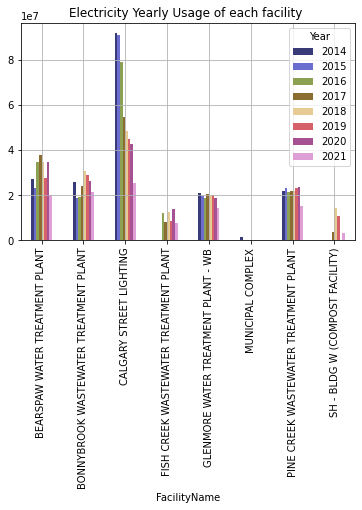

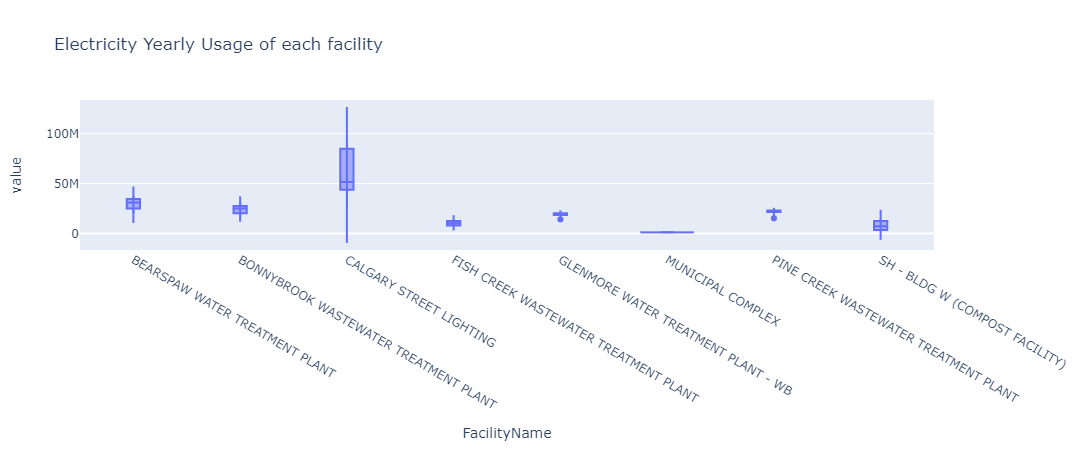

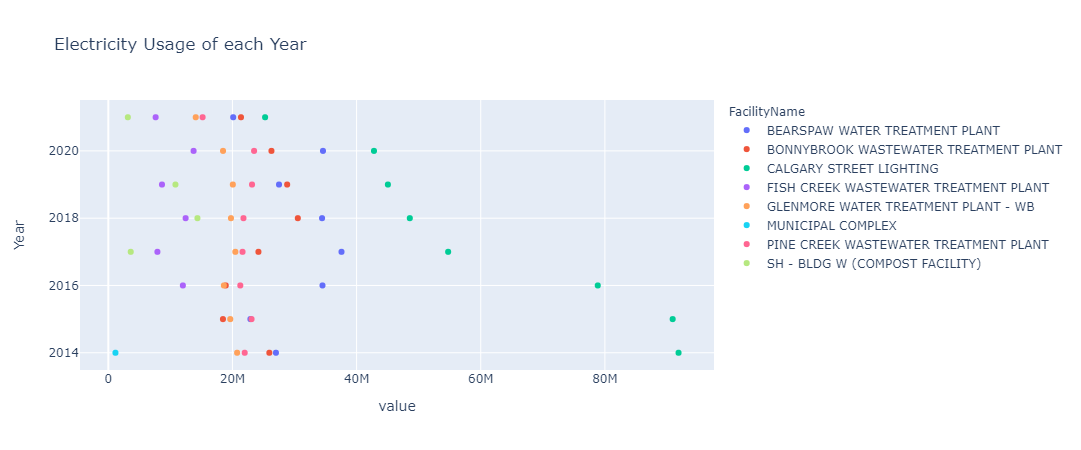

In [23]:
df = pd.DataFrame(rdata,columns=["Business Unit Desc","FacilityName","Site ID", "FacilityAddress","Energy Description",
                                 "Year","Month","Total Consumption","Unit"])

def func(df):
    if(df['Unit'] == 'kWh'):
        df['Total Consumption'] = pd.to_numeric(df['Total Consumption'])*0.0036
        df['Unit'] = 'GJ'
        return df
    else:
        return df
    
df1=pd.DataFrame.drop(rdata,["Business Unit Desc","Site ID","FacilityAddress"], axis=1)
df1 = df1.loc[df1['Energy Description'] == 'Electricity']
df1=df1.loc[df1['Total Consumption'] > 1000000]
df1=df1.loc[df1['Year'].between(2014,2021)]
df1.name = "Electricity Yearly Usage of each facility "
df1=df1.groupby(['FacilityName','Year'])['Total Consumption'].sum().unstack(level=1)
display(df1)

fig = plt.figure()
df1.plot(kind='bar', colormap='tab20b', grid=True, title = 'Electricity Yearly Usage of each facility ')
fig.set_size_inches(3600,3600)
plt.show()


df1=pd.DataFrame.drop(rdata,["Business Unit Desc","Site ID","FacilityAddress"], axis=1)
df1 = df1.loc[df1['Energy Description'] == 'Electricity']
df1=df1.loc[df1['Total Consumption'] > 1000000]
df1=df1.loc[df1['Year'].between(2014,2021)]
df1.name = "Electricity Usage of each Year "
df1=df1.groupby(['FacilityName','Year'])['Total Consumption'].sum().unstack(level=0)
fig = px.violin(df1, y=df1.columns, box=True, title = 'Electricity Yearly Usage of each facility')
fig.show()


fig = px.scatter(df1, x=df1.columns, title = 'Electricity Usage of each Year ')
fig.show()

In [11]:
From the data shows that all of the primary facilities in Calgary have decreased use the electricity from 2014 to 2021. 
BEARSPAW WATER TREATMENT PLANT and  INE CREEK WASTEWATER TREATMENT PLANT were increased the using the electricity from 2015 to 2016 but they were cut down the usage of electricity after 2016.
Base on the violin plot, we realized that the most usage electricity facility is the Calgary Street Lighting and lowest is MUNICIPAL COMPLEX.


SyntaxError: invalid syntax (<ipython-input-11-017062341a4a>, line 1)

Year,2014,2015,2016,2017,2018,2019,2020,2021
FacilityName,,,,,,,,
BONNYBROOK WASTEWATER TREATMENT PLANT,330634.0,330946.0,301646.0,222472.0,297477.0,239497.0,324569.0,230045.0
BUS MAINTENANCE GARAGE - ANDERSON GARAGE,60583.0,36873.0,28061.0,60976.0,65357.0,65526.0,37648.0,13376.0
BUS MAINTENANCE GARAGE - SPRING GARDENS,84489.0,74310.0,90538.0,115916.0,107267.0,97391.0,89211.0,44413.0
BUS MAINTENANCE GARAGE - VICTORIA PARK,35680.0,46058.0,23843.0,23466.0,34771.0,33255.0,21858.0,11263.0
MANCHESTER ASPHALT PLANT,NaN,10875.0,21257.0,NaN,NaN,NaN,NaN,NaN
OLIVER BOWEN MAINTENANCE FACILITY,14030.0,NaN,10468.0,NaN,12024.0,12755.0,NaN,NaN
STONEY TRANSIT FACILITY,NaN,NaN,NaN,NaN,NaN,11107.0,90547.0,63122.0
VILLAGE SQUARE LEISURE CENTRE,NaN,NaN,10017.0,10098.0,43570.0,30835.0,11377.0,NaN


<Figure size 259200x259200 with 0 Axes>

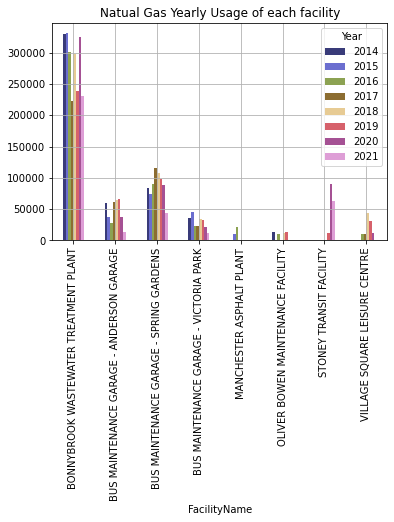

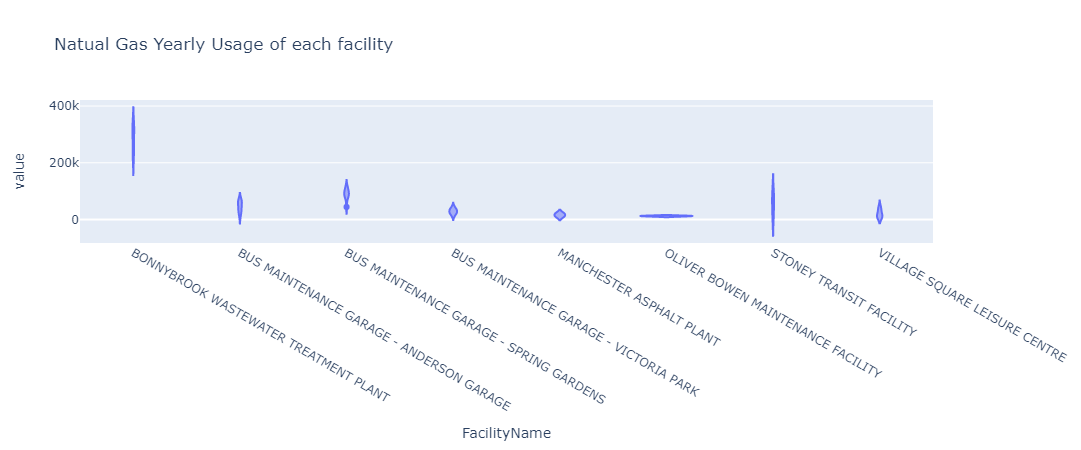

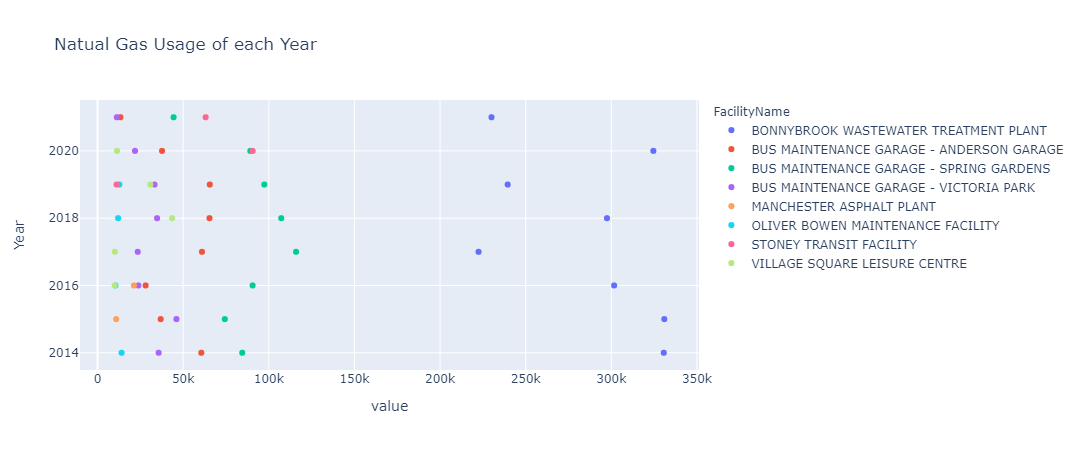

In [24]:
df2=pd.DataFrame.drop(rdata,["Business Unit Desc","Site ID","FacilityAddress"], axis=1)
df2= df2.loc[df2['Energy Description'] == 'Natural Gas']
df2 =df2.loc[df2['Total Consumption'] > 10000]
df2 =df2.loc[df2['Year'].between(2014,2021)]
df2.name = "Natual Gas Yearly Usage of each facility "
df2=df2.groupby(['FacilityName','Year'])['Total Consumption'].sum().unstack(level=1)
display(df2)

fig = plt.figure()
df2.plot(kind='bar', colormap='tab20b', grid=True, title = 'Natual Gas Yearly Usage of each facility')
fig.set_size_inches(3600,3600)
plt.show()

df2=pd.DataFrame.drop(rdata,["Business Unit Desc","Site ID","FacilityAddress"], axis=1)
df2= df2.loc[df2['Energy Description'] == 'Natural Gas']
df2 =df2.loc[df2['Total Consumption'] > 10000]
df2 =df2.loc[df2['Year'].between(2014,2021)]
df2.name = "Natual Gas Usage of each Year "
df2=df2.groupby(['FacilityName','Year'])['Total Consumption'].sum().unstack(level=0)

fig = px.violin(df2, y=df2.columns, title ='Natual Gas Yearly Usage of each facility ')
fig.show()
fig = px.scatter(df2, x=df2.columns, title ='Natual Gas Usage of each Year ')
fig.show()

In [ ]:
From the data shows that all of the primary facilities in Calgary have decreased use the Natural Gas from 2014 to 2021. 
Most primay facilities were increased the using the Natural Gas in 2018 but they were cut down the usage of Natural Gas after 2018.
Base on the violin plot, we realized that the most usage Natural Gas facility is the BONNYBROOK WASTEWATER TREATMENT PLANT and lowest is OLIVER BOWEN MAINTENANCE FACILITY.

Year,2015,2016,2017,2018,2019,2020,2021
FacilityName,,,,,,,
BEARSPAW WATER TREATMENT PLANT,NaN,NaN,NaN,672336.0,645145.0,629182.0,303027.0
CORPORATE WAREHOUSE,NaN,NaN,116749.0,88286.0,78731.0,113931.0,89822.0
GLENMORE WATER TREATMENT PLANT - WB,NaN,NaN,286548.0,232262.0,257429.0,279510.0,171879.0
SH - BLDG W (COMPOST FACILITY),NaN,NaN,NaN,1052172.0,1316807.0,5369296.0,3088045.0
SOUTHLAND LEISURE CENTRE,29977.0,131036.0,156458.0,124332.0,146456.0,138671.0,104938.0
WHITEHORN MULTI SERVICE CENTRE,NaN,NaN,459307.0,365949.0,406581.0,367328.0,283833.0


<Figure size 259200x259200 with 0 Axes>

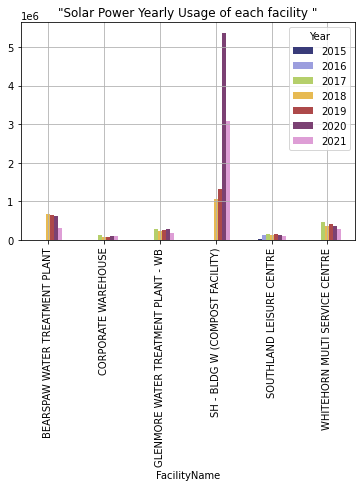

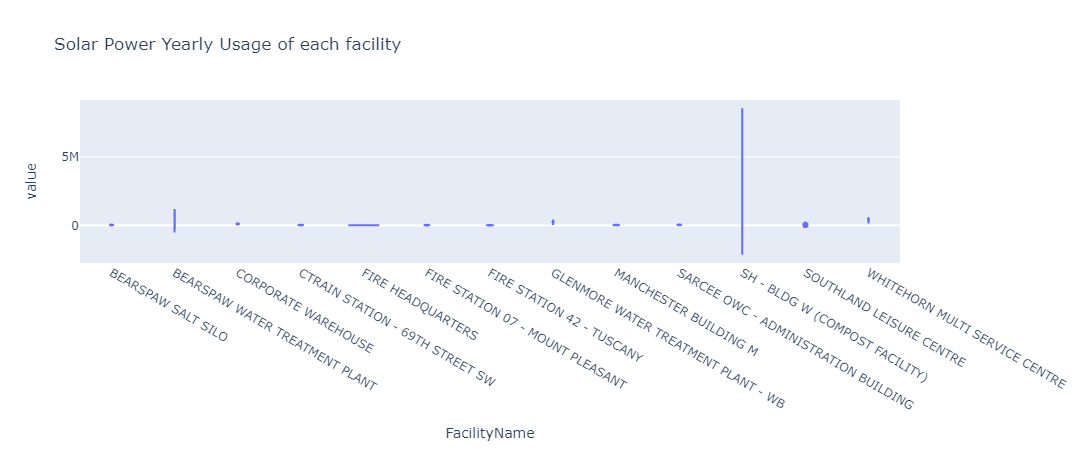

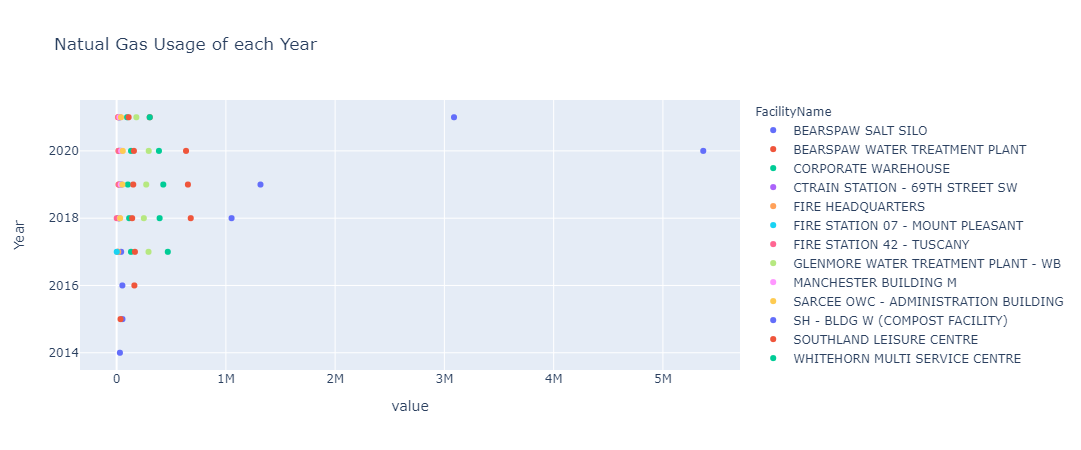

In [25]:
df3=pd.DataFrame.drop(rdata,["Business Unit Desc","Site ID","FacilityAddress"], axis=1)
df3 = df3.loc[df3['Energy Description'] == 'Solar Power']
df3=df3.loc[df3['Total Consumption'] > 10000]
df3=df3.loc[df3['Year'].between(2014,2021)]
df3.name = "Solar Power Yearly Usage of each facility "
df3=df3.groupby(['FacilityName','Year'])['Total Consumption'].sum().unstack(level=1)
display(df3)


fig = plt.figure()
df3.plot(kind='bar', colormap='tab20b', grid=True, title ='"Solar Power Yearly Usage of each facility "')
fig.set_size_inches(3600,3600)
plt.show()

df3=pd.DataFrame.drop(rdata,["Business Unit Desc","Site ID","FacilityAddress"], axis=1)
df3 = df3.loc[df3['Energy Description'] == 'Solar Power']
df3=df3.loc[df3['Total Consumption'] > 1000]
df3=df3.loc[df3['Year'].between(2014,2021)]
df3.name = "Solar Power Usage of each Year "
df3=df3.groupby(['FacilityName','Year'])['Total Consumption'].sum().unstack(level=0)


fig = px.violin(df3, y=df3.columns, title = 'Solar Power Yearly Usage of each facility')
fig.show()
fig = px.scatter(df3, x=df3.columns, title ='Natual Gas Usage of each Year ')
fig.show()

In [ ]:
From the data shows that all of the primary facilities in Calgary have decreased use the Solar Power from 2017 to 2021.
Only SOUTHLAND LEISURE CENTRE has started consumming the Solar Power from 2015. 
Most primay facilities were starting consuming the Solar Power in 2018.
Base on the violin plot, we realized that the most usage Solar Power facility is the SH - BLDG W (COMPOST FACILITY) and lowest is CORPORATE WAREHOUSE.

In [ ]:
The primary facilities in City of Calgary energy consumption trends over the year is that they tried to use less energy consumption.
From our data result, we might figure that many Facilities in the City of Calgary try to make a cleaner environment for future generations by investing in clean technologies and increasing energy efficiency recently. 